In [1]:
import pandas as pd
from pymatgen.core import Composition, Element
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file containing formulas
df = pd.read_csv('../../data/d4_screening_2D_materials/valid2D_Formulas.csv')

In [3]:
# Function to get elements from a formula
def get_elements(formula):
    comp = Composition(formula)
    return [str(el) for el in comp.elements]

# Function to classify elements as metal or non-metal
def classify_elements(elements):
    metals = [el.symbol for el in Element if el.is_metal]
    non_metals = [el.symbol for el in Element if not el.is_metal and el.symbol != "H"]
    classification = []
    for el in elements:
        if el in metals:
            classification.append(f'{el} - Metal')
        elif el in non_metals:
            classification.append(f'{el} - Non-Metal')
        else:
            classification.append(f'{el} - Unknown')
    return classification

# Function to calculate electronegativity of elements in a formula
def calculate_electronegativity(elements):
    electronegativities = []
    for element_str in elements:
        # Get the element object from pymatgen
        element = Element(element_str)
        # Get the electronegativity of the element
        electronegativity = element.X
        electronegativities.append(electronegativity)
    return electronegativities

In [4]:
# Apply the functions to the DataFrame
df['Elements'] = df['formula'].apply(get_elements)
df['Metal_NonMetal'] = df['Elements'].apply(classify_elements)
df['Electronegativity'] = df['Elements'].apply(calculate_electronegativity)
df['Composition'] = df['formula'].apply(lambda x: Composition(x))
df['Num_Elements'] = df['Composition'].apply(lambda x: len(x.elements))  # Number of elements
df['Atomic_Composition'] = df['Composition'].apply(lambda x: x.get_el_amt_dict())  # Atomic composition

c:\Users\aaayu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymatgen\core\periodic_table.py:142: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


In [5]:
df.head(20)

,formula,2D_probability,Elements,Metal_NonMetal,Electronegativity,Composition,Num_Elements,Atomic_Composition
0,S3,0.795150,[S],[S - Non-Metal],[2.58],(S),1,{'S': 3.0}
1,Kr,0.757073,[Kr],[Kr - Non-Metal],[3.0],(Kr),1,{'Kr': 1.0}
2,I2Nd2Ta3At3,0.742599,"[I, Nd, Ta, At]","[I - Non-Metal, Nd - Metal, Ta - Metal, At - N...","[2.66, 1.14, 1.5, 2.2]","(I, Nd, Ta, At)",4,"{'I': 2.0, 'Nd': 2.0, 'Ta': 3.0, 'At': 3.0}"
3,P6,0.737882,[P],[P - Non-Metal],[2.19],(P),1,{'P': 6.0}
4,At5,0.714678,[At],[At - Non-Metal],[2.2],(At),1,{'At': 5.0}
5,Se5,0.762251,[Se],[Se - Non-Metal],[2.55],(Se),1,{'Se': 5.0}
6,PuO3,0.755692,"[Pu, O]","[Pu - Metal, O - Non-Metal]","[1.28, 3.44]","(Pu, O)",2,"{'Pu': 1.0, 'O': 3.0}"
7,Te3,0.820355,[Te],[Te - Non-Metal],[2.1],(Te),1,{'Te': 3.0}
8,Nd2Po3,0.792904,"[Nd, Po]","[Nd - Metal, Po - Non-Metal]","[1.14, 2.0]","(Nd, Po)",2,"{'Nd': 2.0, 'Po': 3.0}"
9,Bi5,0.734979,[Bi],[Bi - Metal],[2.02],(Bi),1,{'Bi': 5.0}


In [6]:
# Function to predict metal_nonmetal for a formula

metals = [el.symbol for el in Element if el.is_metal]
non_metals = [el.symbol for el in Element if not el.is_metal and el.symbol != "H"]

def classify_metal_nonmetal(electroneg_values, elements, threshold=2.1):
    if len(electroneg_values) == 1:  # Check if there's only one element in the formula
        symbol = elements[0]  # Extract the symbol for single-element formulas
        if symbol in metals:
            return 1
        else:
            return 0  
    else:
        avg_electroneg = sum(electroneg_values) / len(electroneg_values)
        if avg_electroneg <= threshold:
            return 1
        else:
            return 0  # Return 1 for metal if average electronegativity is less than or equal to threshold, else 0 for non-metal

In [7]:
# Apply the classification function to each row in the DataFrame
df['Is_Metal'] = df.apply(lambda row: classify_metal_nonmetal(row['Electronegativity'], row['Elements']), axis=1)

# Define a mapping from 0/1 to FALSE/TRUE
mapping = {0: 'FALSE', 1: 'TRUE'}

df['Is_Metal'] = df['Is_Metal'].map(mapping)

In [8]:
df.head(20)

,formula,2D_probability,Elements,Metal_NonMetal,Electronegativity,Composition,Num_Elements,Atomic_Composition,Is_Metal
0,S3,0.795150,[S],[S - Non-Metal],[2.58],(S),1,{'S': 3.0},FALSE
1,Kr,0.757073,[Kr],[Kr - Non-Metal],[3.0],(Kr),1,{'Kr': 1.0},FALSE
2,I2Nd2Ta3At3,0.742599,"[I, Nd, Ta, At]","[I - Non-Metal, Nd - Metal, Ta - Metal, At - N...","[2.66, 1.14, 1.5, 2.2]","(I, Nd, Ta, At)",4,"{'I': 2.0, 'Nd': 2.0, 'Ta': 3.0, 'At': 3.0}",TRUE
3,P6,0.737882,[P],[P - Non-Metal],[2.19],(P),1,{'P': 6.0},FALSE
4,At5,0.714678,[At],[At - Non-Metal],[2.2],(At),1,{'At': 5.0},FALSE
5,Se5,0.762251,[Se],[Se - Non-Metal],[2.55],(Se),1,{'Se': 5.0},FALSE
6,PuO3,0.755692,"[Pu, O]","[Pu - Metal, O - Non-Metal]","[1.28, 3.44]","(Pu, O)",2,"{'Pu': 1.0, 'O': 3.0}",FALSE
7,Te3,0.820355,[Te],[Te - Non-Metal],[2.1],(Te),1,{'Te': 3.0},FALSE
8,Nd2Po3,0.792904,"[Nd, Po]","[Nd - Metal, Po - Non-Metal]","[1.14, 2.0]","(Nd, Po)",2,"{'Nd': 2.0, 'Po': 3.0}",TRUE
9,Bi5,0.734979,[Bi],[Bi - Metal],[2.02],(Bi),1,{'Bi': 5.0},TRUE


In [9]:
# Drop Probabilities Column

# Drop the specific column (e.g., 'column_to_drop')
df.drop(columns=['2D_probability'], inplace=True)
df.drop(columns=['Composition'], inplace=True)

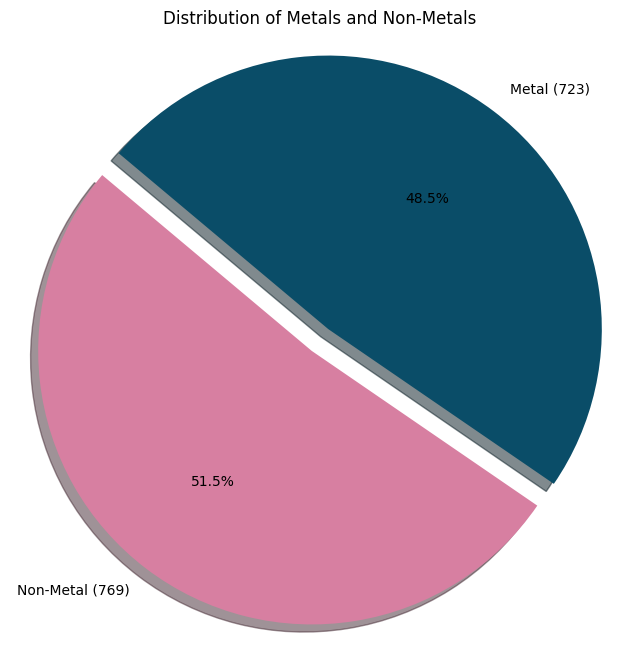

In [10]:
# Count the number of metal and non-metal entries

counts = df['Is_Metal'].value_counts()

# Create labels for the pie chart with counts
labels = [f'Non-Metal ({counts[0]})', f'Metal ({counts[1]})']
sizes = [counts[0], counts[1]]
colors = ['#D77FA1', '#0A4D68']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Non-Metal')

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
plt.title('Distribution of Metals and Non-Metals')

# Show the plot
plt.show()


In [11]:
# Save the dataframe to csv

df.to_csv('../../data/d5_properties_calculation/properties.csv', index=False)